## Preliminary analysis

#### Boxplot per year and location

In [36]:
path = 'Data/Data_audio/MRM/2009/Croin/2009_0805_00h30-1h/2009_08_05-00_30_00.txt'
path_2 = 'Data/Data_audio/MRM/2012/La Roche/2012_06_14-23_26_00.txt'

def length_bull(path):
    f = open(path)
    file = f.read().split('\n')

    list_bull = []
    for i in range(len(file)):
        bull_i = file[i].split('\t')[:2]        
        if len(bull_i) == 2:
            a = float(bull_i[0])
            b = float(bull_i[1])
            length_bull = np.abs(a-b)
            list_bull.append(length_bull)
    return list_bull
length_bull(path)[:5]

[6.107047, 4.001168, 8.599001999999999, 4.141559999999998, 6.633516]

In [37]:
path = 'Data/Data_audio/MRM/2009/Croin/2009_0805_00h30-1h/2009_08_05-00_30_00.txt'
path_2 = 'Data/Data_audio/MRM/2012/La Roche/2012_06_14-23_26_00.txt'

def diff_bull(path):
    f = open(path)
    file = f.read().split('\n')
    dif_bull = []
    
    i=0
    bull_1 = file[i].split('\t')[:2]
    bull_2 = file[i+1].split('\t')[:2]
    if len(bull_1) < 2:
        bull_1 = bull_1[0].split()
        bull_2 = bull_2[0].split()
    debut_1 = np.float(bull_1[0])
    debut_2 = np.float(bull_2[0])
    ecart = np.abs(debut_1-debut_2)
    dif_bull.append(ecart)
    
    for i in range(1,len(file)-1):
        bull_1 = file[i].split('\t')[:2]
        bull_2 = file[i+1].split('\t')[:2]
 
        if (bull_2) != [''] and (bull_1) != [''] :
            
            if  len(bull_2)<2:
                bull_1 = bull_1[0].split()
                bull_2 = bull_2[0].split()
            debut_1 = np.float(bull_1[0])
            
            debut_2 = np.float(bull_2[0])
            ecart = np.abs(debut_1-debut_2)
            dif_bull.append(ecart)
    return dif_bull
diff_bull(path)[:5]

[11.652524999999999,
 70.195932,
 11.828015000000008,
 16.776826999999997,
 43.100303]

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


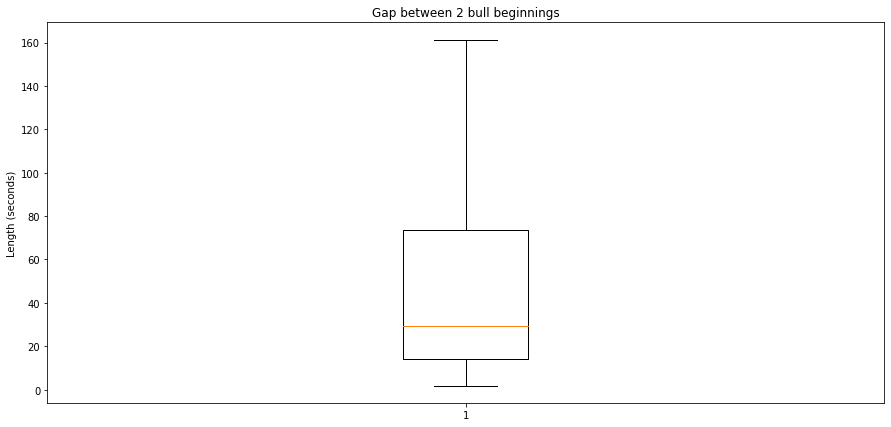

In [38]:
def getBull_diff(path_directory):

    files_path = []
    bull = []
    list_site = []

    for path, subdirs, files in os.walk(path_directory):

        for name in files :
            
            if name.endswith(".txt"):
                
                # Liste des noms des sites + années
                name_site = path.split('MRM')[1]
                name_site = name_site.split(os.path.sep)
                list_site.append(name_site[1]+ ' '+name_site[2])
                
                files_path.append(path+os.path.sep+name) 
                bull.append(diff_bull(files_path[-1]))
                #print('len(bull[-1])',len(bull[-1]))
                
                # Longueur des bulls
                if len(list_site)>1:
                    
                    if list_site[-2] == list_site[-1]:
                        list_site = list_site[:-1]
                        bull = bull[:-1]
                        files_path.append(path+os.path.sep+name) 
                        bull[-1] = bull[-1] + diff_bull(files_path[-1])
                        
    return list_site,bull 

x,y = getBull_diff(path_folder_MRM)
fig1, ax1 = plt.subplots(figsize = (15,7))
#ax1.plot(y_5)

ax1.set_title('Gap between 2 bull beginnings')
ax1.set_ylabel('Length (seconds)') 
a = [ i for t in y for i in t ]
ax1.boxplot(a, showfliers=False)
#ax1.xaxis.set_ticklabels(x)
fig1.show()
plt.savefig('Graph/OK/Ecart.png')

In [39]:
def getBull(path_directory):

    files_path = []
    bull = []
    list_site = []

    for path, subdirs, files in os.walk(path_directory):

        for name in files :
            if name.endswith(".txt"):
                # Longueur des bulls
                files_path.append(path+os.path.sep+name)
                bull.append(length_bull(files_path[-1]))
                
                # Liste des noms des sites + années
                name_site = path.split('MRM')[1]
                name_site = name_site.split(os.path.sep)
                list_site.append(name_site[1]+ ' '+name_site[2])
                

    return list_site,bull 
path_folder_MRM =  "C:/Users/alexi/OneDrive/Bureau/IMT Mines Alès/3A/S10/10.3 - Etudes Techniques/Data/Data_audio/MRM"
x,y = getBull(path_folder_MRM)

In [40]:
# Transformation des fichiers audio en spectrogramme
transform = transforms.Compose([torchaudio.transforms.MelSpectrogram()]) # Il faudrait déterminer les paramètres de transformation
batch_size = 32
df = MyDataset(files_path, y, transform)

n = len(df)
train_indexes = np.arange(0, round(0.6*n), 1).tolist()
validation_indexes = np.arange(round(0.6*n), round(0.8*n), 1).tolist()
test_indexes = np.arange(round(0.8*n), n, 1).tolist()

train_set = torch.utils.data.Subset(df, train_indexes)
validation_set = torch.utils.data.Subset(df, validation_indexes)
test_set = torch.utils.data.Subset(df, test_indexes)

trainloader = DataLoader(train_set,batch_size=batch_size, shuffle=True, num_workers=0)
validationloader = DataLoader(validation_set,batch_size=batch_size, shuffle=True, num_workers=0)
testloader = DataLoader(test_set,batch_size=batch_size, shuffle=True, num_workers=0)

# Some stats
bulls = y[y == 1.0]
no_bulls = y[y == 0.0]
print('len(bulls): ',len(bulls))
print('len(no_bulls): ',len(no_bulls))

print(trainloader)

C:\Users\alexi\Anaconda3\lib\site-packages\torchaudio\functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


IndexError: list index out of range

In [41]:
def getBull_2(path_directory):

    files_path = []
    bull = []
    list_site = []

    for path, subdirs, files in os.walk(path_directory):

        for name in files :
            
            if name.endswith(".txt"):
                
                # Liste des noms des sites + années
                name_site = path.split('MRM')[1]
                name_site = name_site.split(os.path.sep)
                list_site.append(name_site[1]+ ' '+name_site[2])
                
                files_path.append(path+os.path.sep+name) 
                bull.append(length_bull(files_path[-1]))
                

                #print('len(bull[-1])',len(bull[-1]))
                
                # Longueur des bulls
                if len(list_site)>1:
                    
                    if list_site[-2] == list_site[-1]:
                        list_site = list_site[:-1]
                        bull = bull[:-1]
                        files_path.append(path+os.path.sep+name) 
                        bull[-1] = bull[-1] + length_bull(files_path[-1])
                        
    return list_site,bull 


def prop_bull(y):
    c=[]
    for i in range(len(y)):
        c.append(len(y[i])+1)
        s = np.sum(c)
    return (100*(c/s))

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


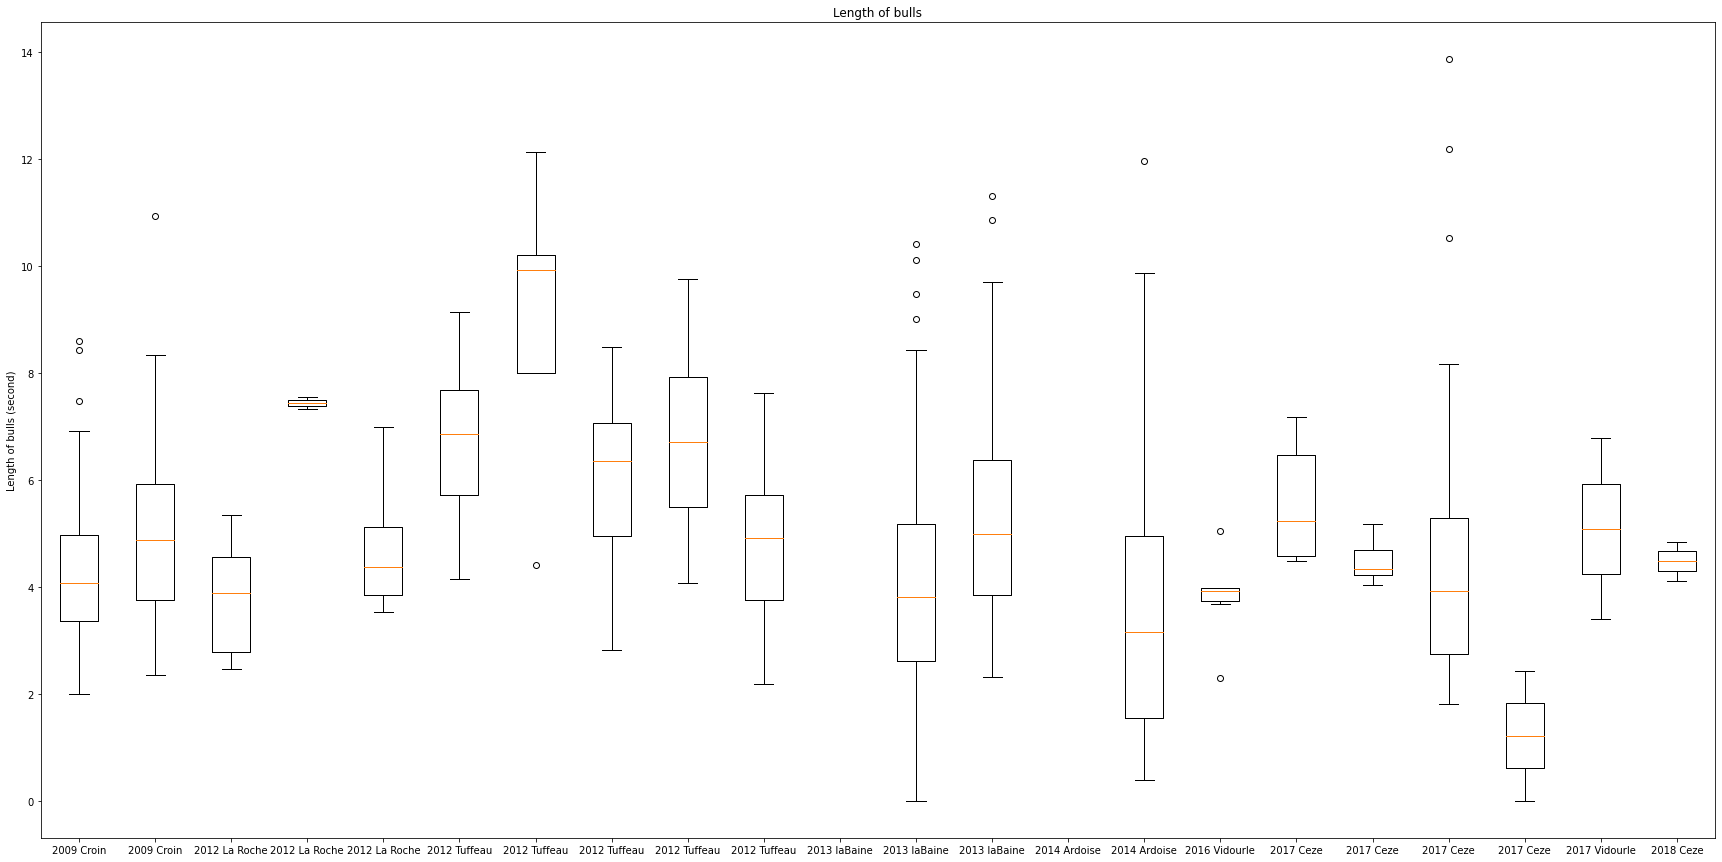

In [50]:
path_folder_MRM =  "C:/Users/alexi/OneDrive/Bureau/IMT Mines Alès/S10/10.3 - Etudes Techniques/Data/Data_audio/MRM"
x,y = getBull(path_folder_MRM)
y_5 = [5 for i in range(len(x)+1)]

fig1, ax1 = plt.subplots(figsize = (30,15))
#ax1.plot(y_5)
ax1.set_title('Length of bulls')
ax1.set_ylabel('Length of bulls (second)') 
ax1.boxplot(y)

ax1.xaxis.set_ticklabels(x)
fig1.show()
plt.savefig('Graph/OK/Boxplot_par_site_et_annee.png')

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


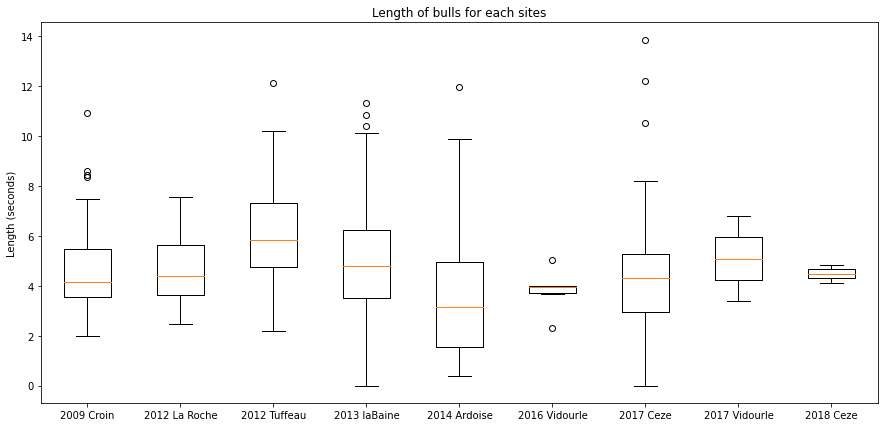

In [43]:
x,y = getBull_2(path_folder_MRM)
y_5 = [5 for i in range(len(y)+1)]


fig1, ax1 = plt.subplots(figsize = (15,7))
#ax1.plot(y_5)

ax1.set_title('Length of bulls for each sites')
ax1.set_ylabel('Length (seconds)') 
ax1.boxplot(y)
ax1.xaxis.set_ticklabels(x)
fig1.show()
plt.savefig('Graph/OK/Boxplot_par_site_2.png')

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


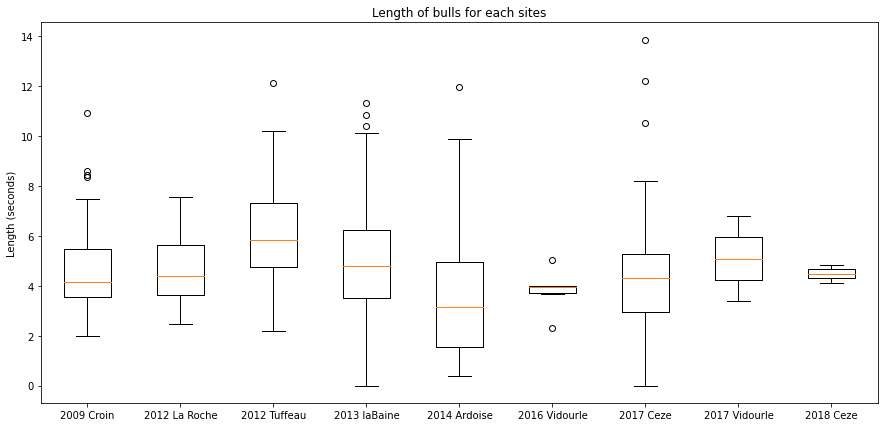

In [44]:
x,y = getBull_2(path_folder_MRM)
y_5 = [5 for i in range(len(y)+1)]


fig1, ax1 = plt.subplots(figsize = (15,7))
#ax1.plot(y_5)

ax1.set_title('Length of bulls for each sites')
ax1.set_ylabel('Length (seconds)') 
ax1.boxplot(y)
ax1.xaxis.set_ticklabels(x)
fig1.show()
plt.savefig('Graph/OK/Boxplot_par_site_2.png')

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


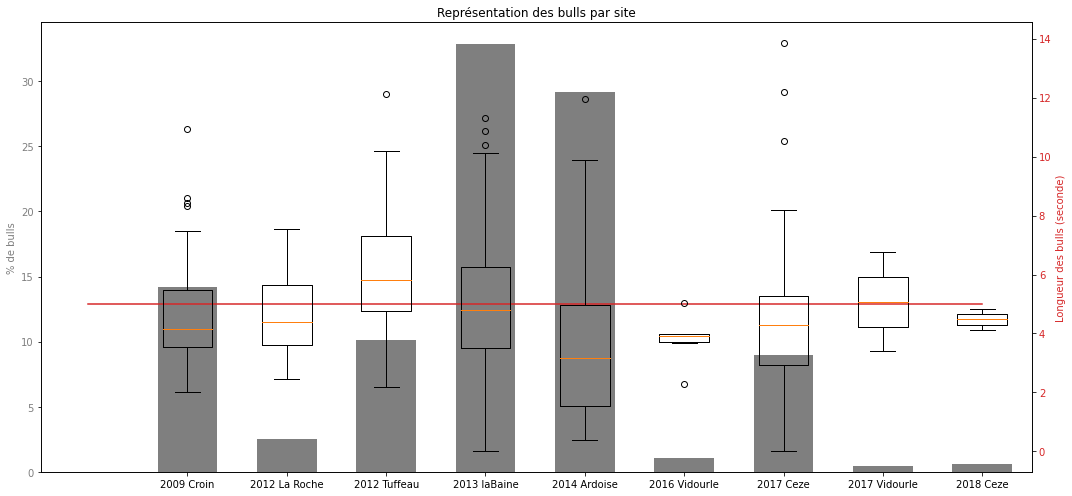

In [45]:
x,y = getBull_2(path_folder_MRM)
x_id = [i+1 for i in range(len(x))]
y_count = prop_bull(y)
y_5 = [5 for i in range(len(y)+1)]

fig, ax1 = plt.subplots(figsize = (15,7))
ax1.set_title('Représentation des bulls par site')

color = 'tab:grey'
ax1.set_ylabel('% de bulls', color=color)  # we already handled the x-label with ax1
ax1.bar(x_id,y_count,color=color,width = 0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_ticklabels(x)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Sites')
ax2.plot(y_5,color=color)
ax2.set_ylabel('Longueur des bulls (seconde)', color=color)
ax2.boxplot(y,widths = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig('Graph/OK/Boxplot_ET_Barplot_par_site.png')

C:\Users\alexi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


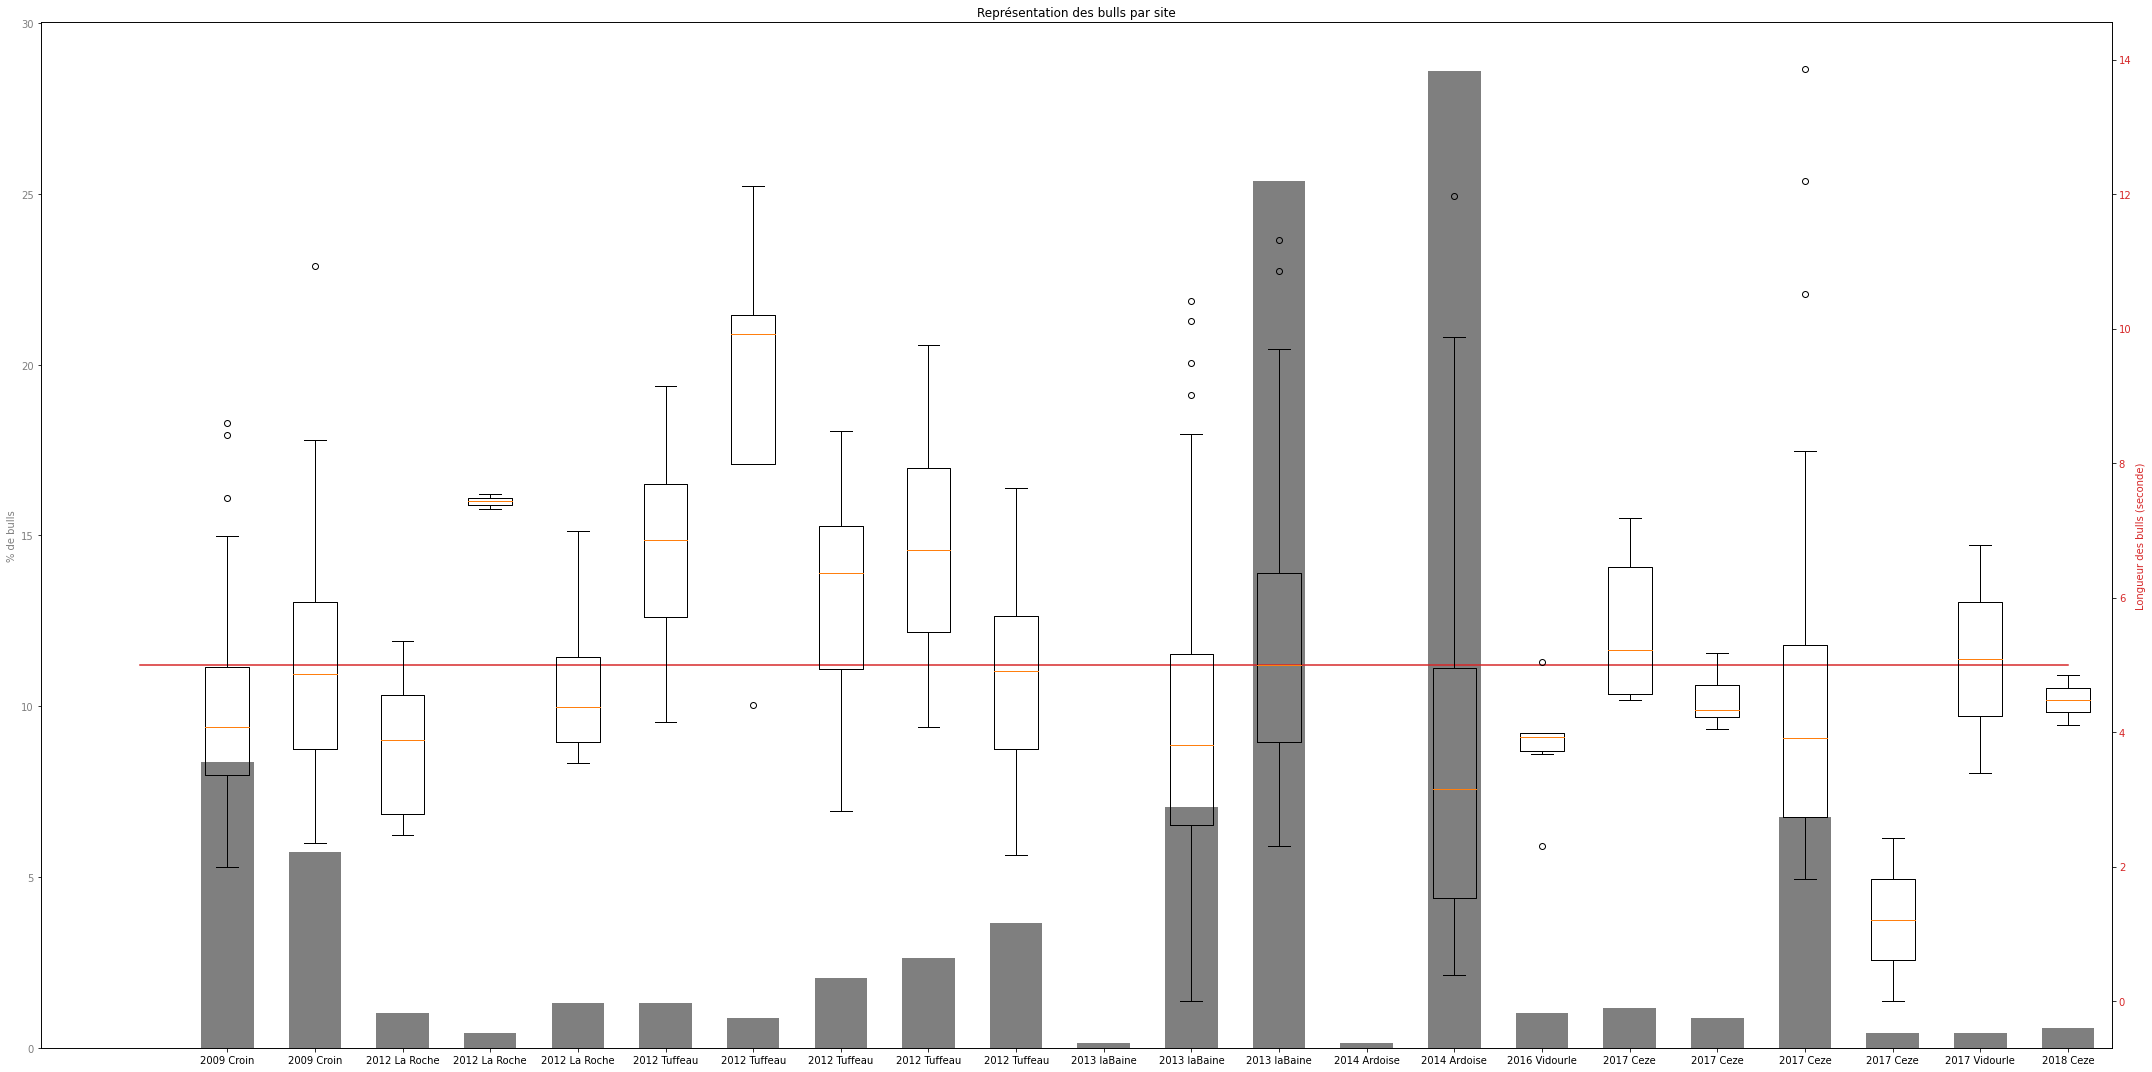

In [46]:
x,y = getBull(path_folder_MRM)
y_count = prop_bull(y)
x_id = [i+1 for i in range(len(x))]
y_5 = [5 for i in range(len(y)+1)]

fig, ax1 = plt.subplots(figsize = (30,15))
ax1.set_title('Représentation des bulls par site')

color = 'tab:grey'
ax1.set_ylabel('% de bulls', color=color)  # we already handled the x-label with ax1
ax1.bar(x_id,y_count,color=color,width = 0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.xaxis.set_ticklabels(x)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_xlabel('Sites')
ax2.plot(y_5,color=color)
ax2.set_ylabel('Longueur des bulls (seconde)', color=color)
ax2.boxplot(y,widths = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
fig.savefig('Graph/OK/Boxplot_ET_Boxplot_par_site_et_annee.png')

In [49]:
ex_nom = '2012 La Roche'

def indice_bull(path):
    f = open(path)
    file = f.read().split('\n')

    list_bull = []
    for i in range(len(file)):
        bull_i = file[i].split('\t')[:2]
        if len(bull_i) == 2:
            a = float(bull_i[0])
            b = float(bull_i[1])
            list_bull.append([a,b])
    return list_bull


def getBull_temp(path_directory):

    files_path = []
    bull = []
    list_site = []

    for path, subdirs, files in os.walk(path_directory):

        for name in files :
            # Liste des noms des sites + années
            name_site = path.split('MRM')[1]
            name_site = name_site.split(os.path.sep)
            name_site = [name_site[1]+ ' '+name_site[2]]
            if name.endswith(".txt") and name_site[0] == ex_nom :
                print('ok')
                # Longueur des bulls
                files_path.append(path+os.path.sep+name)
                bull.append(indice_bull(files_path[-1]))
                
                
                

    return bull 
path_folder_MRM =  "/Data/Data_audio/MRM"
x = getBull_temp(path_folder_MRM)
x

[]

### Nombre de bull par site et étude

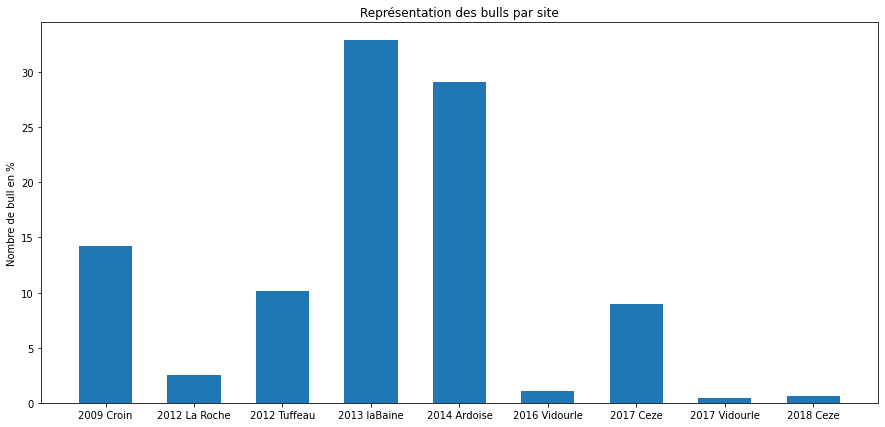

In [53]:
x,y = getBull_2(path_folder_MRM)
y_count = prop_bull(y)
x_id = [i+1 for i in range(len(x))]

fig, ax1 = plt.subplots(figsize = (15,7))
ax1.set_title('Représentation des bulls par site')
ax1.set_ylabel('% de bulls') 
ax1.bar(x_id,y_count,width = 0.6,tick_label =x)
plt.ylabel("Nombre de bull en %")
fig.savefig('Graph/OK/NB_bull.png')

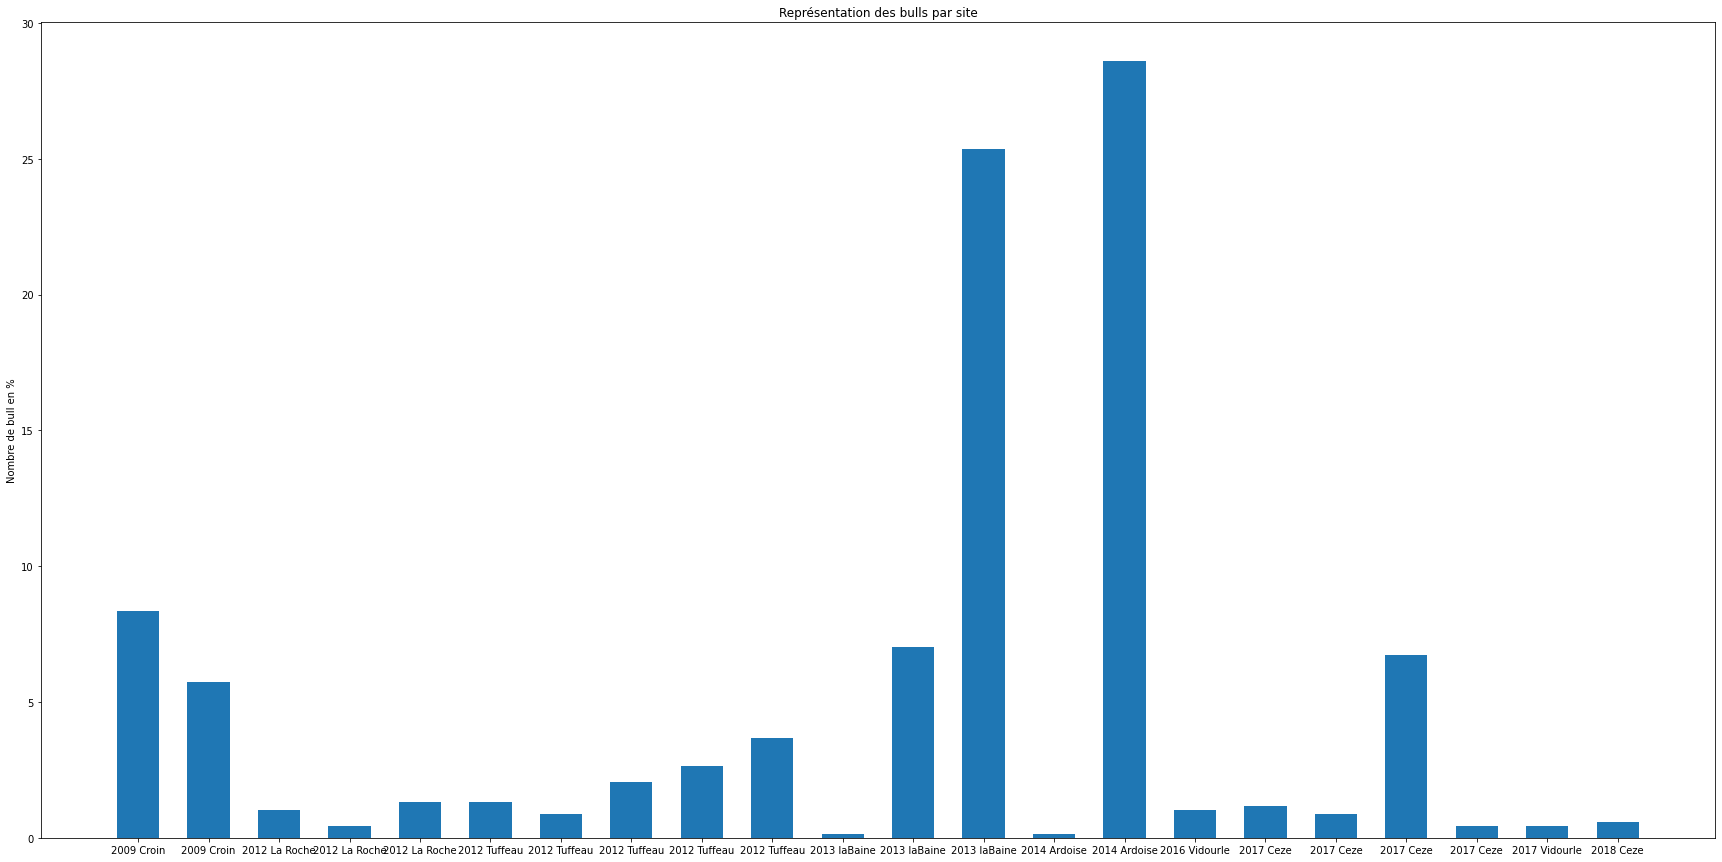

In [54]:
x,y = getBull(path_folder_MRM)
y_count = prop_bull(y)
x_id = [i+1 for i in range(len(x))]

fig, ax1 = plt.subplots(figsize = (30,15))
ax1.set_title('Représentation des bulls par site')
ax1.set_ylabel('% de bulls') 
ax1.bar(x_id,y_count,width = 0.6,tick_label =x)
plt.ylabel("Nombre de bull en %")
ax1.xaxis.set_ticklabels(x)
fig.savefig('Graph/OK/NB_bull_par_site_et_annee.png')

In [ ]:
x,y = getBull(path_folder_MRM)

fig3, ax3 = plt.subplots(figsize = (15,7))
ax3.bar(x,y)


## Modèle CNN

### Def train_optim

In [55]:
def train_optim(model,batch_size ,epochs, log_frequency, learning_rate=1e-4):
    
    #Import des données
    trainloader,validationloader,testloader = audio_importation(batch_size)
    
    loss_fn = torch.nn.CrossEntropyLoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(epochs):
        model.train() # we specify that we are training the model

        # At each epoch, the training set will be processed as a set of batches
        for batch_id,  batch in enumerate(trainloader) : 

            images, labels  = batch
            labels = labels.long()

            # we put the data on the same device
            #images , labels = images.to(device), labels.to(device)  

            y_pred = model(images) # forward pass output=logits

            loss = loss_fn(y_pred, labels)

            #if batch_id % log_frequency == 0:
            
            if (batch_id+1) % 4 == 0 :
                optimizer.zero_grad() # clear the gradient before backward
                    
                loss.backward()       # update the gradient

                optimizer.step() # update the model parameters using the gradient
                print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        # Model evaluation after each step computing the accuracy
        AlexNet.eval()
        total = 0
        total_bulls = 0
        total_no_bulls = 0
        correct = 0
        correct_bulls = 0
        correct_no_bulls = 0

        for batch_id, batch in enumerate(testloader):

            images , labels = batch

            bulls = torch.tensor([1 for i in range(labels.shape[0])])
            no_bulls = torch.tensor([0 for i in range(labels.shape[0])])

            labels = labels.long() # float --> Long

            #images , labels = images.to(device), labels.to(device)

            y_pred = AlexNet(images) # forward computes the logits
            sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
            _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max

            total += labels.size(0)
            total_bulls += (labels == bulls).sum().item()
            total_no_bulls += (labels == no_bulls).sum().item()
            correct += (predicted == labels).sum().item()
            correct_bulls += ( (predicted == labels) & (labels == bulls) ).sum().item()
            correct_no_bulls += ( (predicted == labels) & (labels == no_bulls) ).sum().item()

        print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))
        print("[validation] bulls_recall: {:.3f}%\n".format(100 * correct_bulls / total_bulls))
        print("[validation] not_bulls_recall: {:.3f}%\n".format(100 * correct_no_bulls / total_no_bulls))

### Import and modification modèle 

In [56]:
from torchvision import models
import torch
# https://pytorch.org/docs/stable/torchvision/models.html

AlexNet = models.alexnet(pretrained=True)

AlexNet = torch.nn.Sequential(
    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),
    AlexNet,
    torch.nn.Linear(in_features=1000, out_features=2, bias=True)
)
summary(AlexNet, (1, 128, 2206))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 3, 128, 2206]               3
            Conv2d-2          [-1, 64, 31, 550]          23,296
              ReLU-3          [-1, 64, 31, 550]               0
         MaxPool2d-4          [-1, 64, 15, 274]               0
            Conv2d-5         [-1, 192, 15, 274]         307,392
              ReLU-6         [-1, 192, 15, 274]               0
         MaxPool2d-7          [-1, 192, 7, 136]               0
            Conv2d-8          [-1, 384, 7, 136]         663,936
              ReLU-9          [-1, 384, 7, 136]               0
           Conv2d-10          [-1, 256, 7, 136]         884,992
             ReLU-11          [-1, 256, 7, 136]               0
           Conv2d-12          [-1, 256, 7, 136]         590,080
             ReLU-13          [-1, 256, 7, 136]               0
        MaxPool2d-14           [-1, 256

In [57]:
vgg16 = models.vgg11(pretrained=True)
vgg16 = torch.nn.Sequential(
    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),
    vgg16,
    torch.nn.Linear(in_features=1000, out_features=2, bias=True)
)
summary(vgg16, (1, 128, 2206))
'''
googlenet = models.googlenet(pretrained=True)

googlenet = torch.nn.Sequential(
    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),
    googlenet,
    torch.nn.Linear(in_features=1000, out_features=2, bias=True)
)
summary(googlenet, (1, 128, 2206))
'''

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 3, 128, 2206]               3
            Conv2d-2        [-1, 64, 128, 2206]           1,792
              ReLU-3        [-1, 64, 128, 2206]               0
         MaxPool2d-4         [-1, 64, 64, 1103]               0
            Conv2d-5        [-1, 128, 64, 1103]          73,856
              ReLU-6        [-1, 128, 64, 1103]               0
         MaxPool2d-7         [-1, 128, 32, 551]               0
            Conv2d-8         [-1, 256, 32, 551]         295,168
              ReLU-9         [-1, 256, 32, 551]               0
           Conv2d-10         [-1, 256, 32, 551]         590,080
             ReLU-11         [-1, 256, 32, 551]               0
        MaxPool2d-12         [-1, 256, 16, 275]               0
           Conv2d-13         [-1, 512, 16, 275]       1,180,160
             ReLU-14         [-1, 512, 

'\ngooglenet = models.googlenet(pretrained=True)\n\ngooglenet = torch.nn.Sequential(\n    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),\n    googlenet,\n    torch.nn.Linear(in_features=1000, out_features=2, bias=True)\n)\nsummary(googlenet, (1, 128, 2206))\n'

In [58]:
resnet18 = models.resnet18(pretrained=True)
resnet18

resnet18 = torch.nn.Sequential(
    #torch.nn.Linear(in_features=D_in, out_features=3, bias=True),
    torch.nn.Conv2d(1, 3, (1,1), stride=(1,1), padding=0, bias=False),
    resnet18,
    torch.nn.Linear(in_features=1000, out_features=2, bias=True)
)
summary(resnet18, (1, 128, 2206))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 3, 128, 2206]               3
            Conv2d-2         [-1, 64, 64, 1103]           9,408
       BatchNorm2d-3         [-1, 64, 64, 1103]             128
              ReLU-4         [-1, 64, 64, 1103]               0
         MaxPool2d-5          [-1, 64, 32, 552]               0
            Conv2d-6          [-1, 64, 32, 552]          36,864
       BatchNorm2d-7          [-1, 64, 32, 552]             128
              ReLU-8          [-1, 64, 32, 552]               0
            Conv2d-9          [-1, 64, 32, 552]          36,864
      BatchNorm2d-10          [-1, 64, 32, 552]             128
             ReLU-11          [-1, 64, 32, 552]               0
       BasicBlock-12          [-1, 64, 32, 552]               0
           Conv2d-13          [-1, 64, 32, 552]          36,864
      BatchNorm2d-14          [-1, 64, 

### Phase de test

In [63]:
transform = transforms.Compose(
    [
        torchaudio.transforms.MelSpectrogram() # Il faudrait déterminer les paramètres de transformation
    ]
)

#train_optim(model = resnet18,batch_size = 32 ,epochs = 1, log_frequency = 20, learning_rate=1e-4)
train_optim(model = vgg16,batch_size = 4 ,epochs = 1, log_frequency = 1, learning_rate=1e-4)

len(bulls):  56
len(no_bulls):  56


IndexError: list index out of range

In [60]:
PATH = "C:/Users/alexi/OneDrive/Bureau/IMT Mines Alès/3A/S10/10.3 - Etudes Techniques/Model/Resnet18_Pre/Resnet_Pre.pth"
torch.save(resnet18,PATH)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/alexi/OneDrive/Bureau/IMT Mines Alès/3A/S10/10.3 - Etudes Techniques/Model/Resnet18_Pre/Resnet_Pre.pth'

In [61]:
model = torch.load(PATH)
model.eval()
batch_size = 32
_,validationloader,testloader = audio_importation(batch_size)

total = 0
total_bulls = 0
total_no_bulls = 0
correct = 0
correct_bulls = 0
correct_no_bulls = 0

for batch_id, batch in enumerate(testloader):

    images , labels = batch

    bulls = torch.tensor([1 for i in range(labels.shape[0])])
    no_bulls = torch.tensor([0 for i in range(labels.shape[0])])

    labels = labels.long() # float --> Long

    #images , labels = images.to(device), labels.to(device)

    y_pred = model(images) # forward computes the logits
    sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
    _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max

    total += labels.size(0)
    total_bulls += (labels == bulls).sum().item()
    total_no_bulls += (labels == no_bulls).sum().item()
    correct += (predicted == labels).sum().item()
    correct_bulls += ( (predicted == labels) & (labels == bulls) ).sum().item()
    correct_no_bulls += ( (predicted == labels) & (labels == no_bulls) ).sum().item()

print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))
print("[validation] bulls_recall: {:.3f}%\n".format(100 * correct_bulls / total_bulls))
print("[validation] not_bulls_recall: {:.3f}%\n".format(100 * correct_no_bulls / total_no_bulls))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/alexi/OneDrive/Bureau/IMT Mines Alès/3A/S10/10.3 - Etudes Techniques/Model/Resnet18_Pre/Resnet_Pre.pth'

In [62]:
from torchsummary import summary
print(len(batch))
print(len(batch[0]))
print(len(batch[0][0]))
print(len(batch[0][0][0]))
print(len(batch[0][0][0][0]))
summary(AlexNet, (1, 128, 2206))

NameError: name 'batch' is not defined